In [1]:
!pip install tensorflow==2.12.0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
tf. __version__

'2.12.0'

In [3]:
## Loading and Preprocessing Dataset

In [9]:
'''the left side of the assignment destructures the returned tuples from load_data().X_train():
this is the training dataset containing the images of the handwritten digits. it will be numpy array of shape(60000,28,28)
where 60,000 are number of training smapeles and 28 * 28 is the resolution of each image'''

'the left side of the assignment destructures the returned tuples from load_data().X_train():\nthis is the training dataset containing the images of the handwritten digits. it will be numpy array of shape(60000,28,28)\nwhere 60,000 are number of training smapeles and 28 * 28 is the resolution of each image'

In [4]:
(X_train,y_train),(_,_)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
28 * 28

784

In [8]:
y_train.shape

(60000,)

#this code shows the image of random number between 0 to 60,000

5


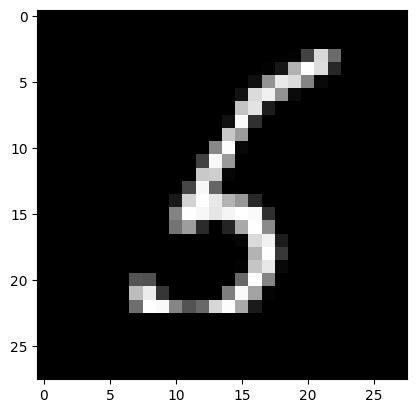

In [11]:
i=np.random.randint(0,60000)  #this code shows the image of random number between 0 to 60,000
print(y_train[i])
plt.imshow(X_train[i],cmap='gray');

Converting data into float format

In [12]:
#now make it in a float format
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')

In [13]:
X_train.shape

(60000, 28, 28, 1)

Perform normalization

In [14]:
X_train[0].min(),X_train[0].max()

(0.0, 255.0)

normalizing data to -1 to +1

In [15]:
X_train=(X_train-127.5)/127.5

In [16]:
X_train[0].min(),X_train[0].max()

(-1.0, 1.0)

In [18]:
buffer_size=60000
batch_size=256

In [19]:
buffer_size/batch_size

234.375

In [20]:
type(X_train)

numpy.ndarray

In [21]:
X_train=tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

This code transform X_train which is typically a large dataset into tf.data.Dataset object, shuffles the datawith a buffer size of buffer_sise and groups it into batches of size batch_size for efficient training. this is preprocessing step before feeding data into TensorFlow model.

In [22]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [23]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

## Building the **generator** **bold text**

batch normalization :
https://keras.io/api/layers/normalization_layers/batch_normalization/

leaky relu:
https://keras.io/api/layers/activation_layers/leaky_relu/

activation function:
https://keras.io/ap

In [32]:
def build_generator( ):
  network = tf.keras.Sequential()
  network.add(layers.Dense(7*7*256,use_bias=False,input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  network.add(layers.Reshape((7,7,256)))
 #7x7x128
  network.add(layers.Conv2DTranspose(filters=128,kernel_size=(5,5),strides=(1,1),padding='same',use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
#14x14x64
  network.add(layers.Conv2DTranspose(filters=64,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
#28x28x1
  network.add(layers.Conv2DTranspose(filters=1,kernel_size=(5,5),strides=(2,2),padding='same',use_bias=False,activation='tanh'))
  network.summary()
  return network

In [33]:
generator=build_generator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12544)             1254400   
                                                                 
 batch_normalization_3 (Batc  (None, 12544)            50176     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 12544)             0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 7, 7, 128)        819200    
 ranspose)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)       

In [34]:
noise=tf.random.normal([1,100])

In [35]:
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[-1.4463009 , -1.7709937 ,  0.83962417,  0.01522517,  0.12060987,
         0.18497728, -0.9676984 , -0.16643086,  1.5931429 ,  0.9652873 ,
         1.24027   ,  0.00842319, -0.39197093, -0.58584654, -1.5480721 ,
         0.5792084 ,  1.3411705 , -0.8130868 , -1.047485  ,  0.33433747,
         0.9311531 , -0.14157102, -0.25563228,  1.1972052 , -1.1503477 ,
        -0.4216789 , -0.01213989, -0.6030931 ,  0.7257555 , -0.5452866 ,
         0.04655166,  0.29598024, -2.1279213 ,  1.4325051 , -0.581958  ,
        -1.4807165 , -1.0262073 ,  0.8327035 , -1.9135778 , -1.1211236 ,
         0.65884435, -0.75686693, -0.9676812 , -0.8057837 , -0.0426186 ,
         1.2323786 ,  0.91004163,  0.5222088 ,  1.8058515 ,  0.1448369 ,
         0.03884815,  0.9598099 ,  1.6246364 , -0.6479079 , -0.5566321 ,
        -0.41791856,  1.1490521 , -0.2925001 ,  0.17335157,  0.5173311 ,
         0.23053162, -0.07951979,  1.8101784 ,  1.0082904 , -0.63772064,
 

In [36]:
generated_image=generator(noise,training=False)

In [37]:
generated_image.shape

TensorShape([1, 28, 28, 1])

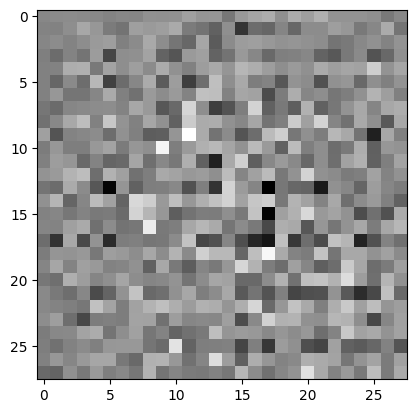

In [38]:
plt.imshow(generated_image[0,:,:,0],cmap='gray');

## **Build Descriminator**

Dropout: https://jmlr.org/papers/volume15/sriv

In [39]:
def build_discriminator( ):
  network = tf.keras.Sequential()

  #14x14x64
  network.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(2,2),padding='same',input_shape=[28,28,1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))
 #7x7x128
  network.add(layers.Conv2D(filters=128,kernel_size=(5,5),strides=(2,2),padding='same'))

  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))
  network.add(layers.Flatten())
  network.add(layers.Dense(1))


  network.summary()
  return network

In [40]:
7 * 7 * 128

6272

In [41]:
discriminator=build_discriminator()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

In [42]:
discriminator.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [43]:
discriminator(generated_image,training=False) #logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00084388]], dtype=float32)>

In [45]:
tf.sigmoid(-0.00084388) #this value is above output

<tf.Tensor: shape=(), dtype=float32, numpy=0.49978903>

# Error Calculation